In [7]:
import numpy as np
import tensorflow as tf
tf.__version__
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import statsmodels as sm
import statsmodels.api as statm
import statsmodels.formula.api as statfa
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [8]:
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
X = [i[0:2] for i in data]
Y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(Y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(Y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()



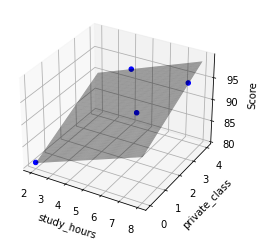

In [9]:
a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)
fig = plt.figure()

graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study_hours')
graph.set_ylabel('private_class')
graph.set_zlabel('Score')

plt.show()